In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt

project_root = Path.cwd().resolve().parent  # parent of notebooks/
sys.path.append(str(project_root))

from src.event_impact_modeling import EventImpactModeler
from src.forecasting import FinancialInclusionForecaster

In [2]:
model = EventImpactModeler(
    data_path="../data/processed/ethiopia_fi_enriched_data.csv",
    impact_links_path="../data/processed/ethiopia_fi_impact_links.csv",
    ramp_months=6
)

2026-02-02 12:19:24,544 | INFO | Loaded 14 events, 32 observations, 5 impact links


In [3]:
print("Unique indicators in dataset:", model.obs["indicator_code"].unique())


Unique indicators in dataset: <StringArray>
[     'ACC_OWNERSHIP',     'ACC_MM_ACCOUNT',         'ACC_4G_COV',
     'ACC_MOBILE_PEN',          'ACC_FAYDA',      'USG_P2P_COUNT',
      'USG_P2P_VALUE',      'USG_ATM_COUNT',      'USG_ATM_VALUE',
      'USG_CROSSOVER', 'USG_TELEBIRR_USERS', 'USG_TELEBIRR_VALUE',
    'USG_MPESA_USERS',   'USG_MPESA_ACTIVE',    'USG_ACTIVE_RATE',
    'AFF_DATA_INCOME',        'GEN_GAP_ACC',       'GEN_MM_SHARE',
     'GEN_GAP_MOBILE',     'ACC_SMARTPHONE',       'USG_INTERNET']
Length: 21, dtype: str


In [4]:
indicator_mapping = {
    "ACC_ACCOUNT_OWNERSHIP": "ACC_OWNERSHIP",
    "USG_DIGITAL_PAYMENT": "USG_TELEBIRR_USERS"
}


In [5]:
forecaster = FinancialInclusionForecaster(model=model, forecast_horizon=36)


In [6]:
forecasts = {}
for requested_code, actual_code in indicator_mapping.items():
    print(f"\nForecasting {requested_code} (mapped to {actual_code})...")
    scenario_dfs = forecaster.scenario_forecast(actual_code)
    if scenario_dfs:
        forecasts[requested_code] = scenario_dfs
        print(f"Forecast generated for {requested_code}.")
    else:
        print(f"No forecast could be generated for {requested_code}.")


2026-02-02 12:19:34,263 | INFO | Fitted trend for ACC_OWNERSHIP using 6 observations.
2026-02-02 12:19:34,282 | INFO | Fitted trend for USG_TELEBIRR_USERS using 1 observations.



Forecasting ACC_ACCOUNT_OWNERSHIP (mapped to ACC_OWNERSHIP)...
Forecast generated for ACC_ACCOUNT_OWNERSHIP.

Forecasting USG_DIGITAL_PAYMENT (mapped to USG_TELEBIRR_USERS)...
Forecast generated for USG_DIGITAL_PAYMENT.



Plotting forecast for ACC_ACCOUNT_OWNERSHIP...


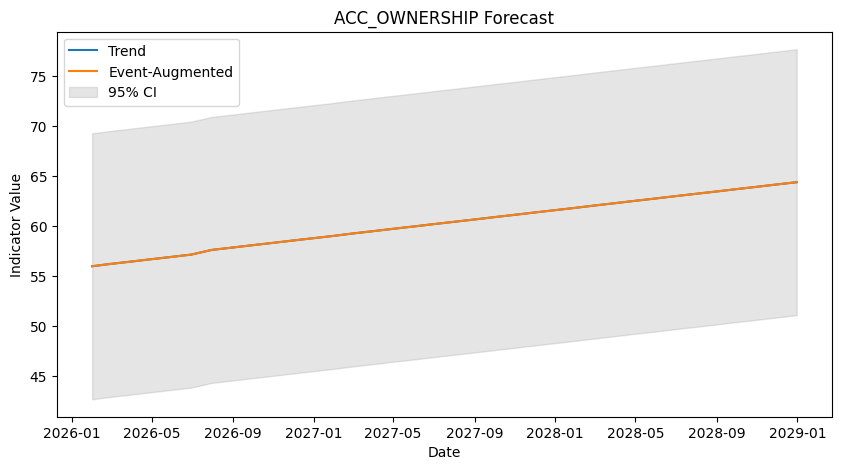


Plotting forecast for USG_DIGITAL_PAYMENT...


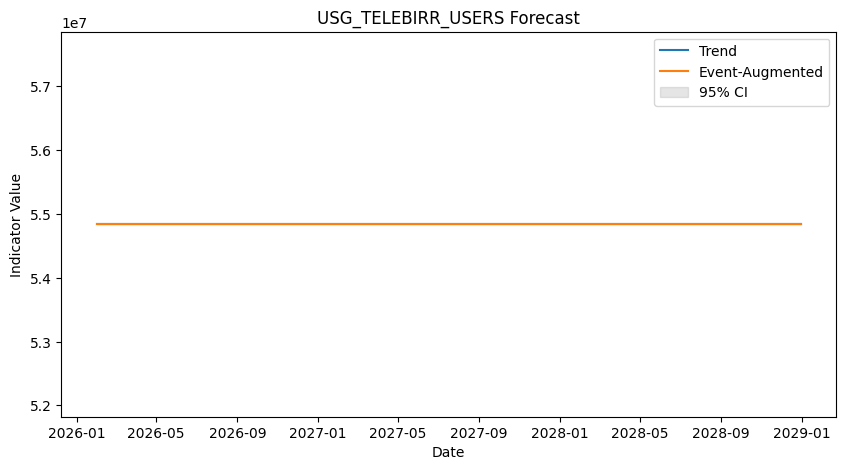

In [7]:
for requested_code, actual_code in indicator_mapping.items():
    print(f"\nPlotting forecast for {requested_code}...")
    forecaster.plot_forecast(actual_code)

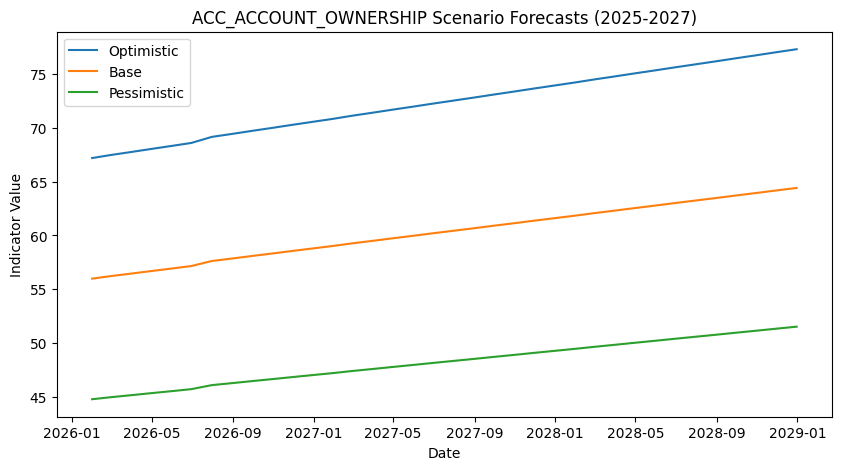

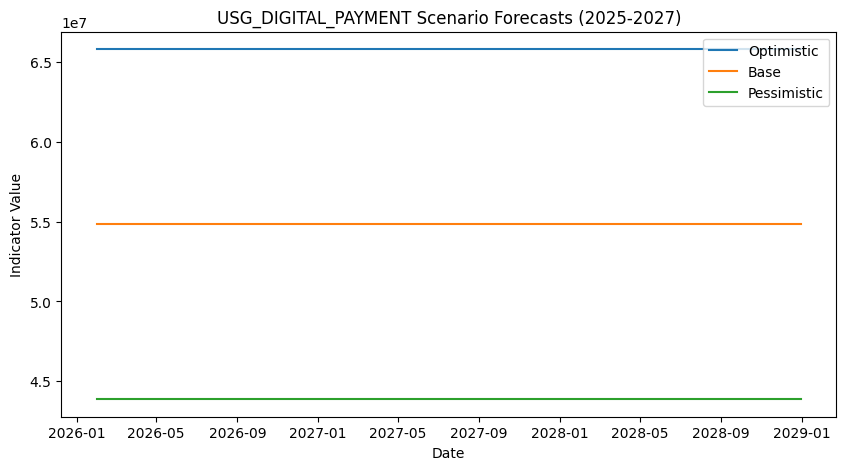

In [8]:
for requested_code in forecasts.keys():
    plt.figure(figsize=(10,5))
    for scenario, df in forecasts[requested_code].items():
        plt.plot(df.index, df["forecast"], label=scenario.capitalize())
    plt.title(f"{requested_code} Scenario Forecasts (2025-2027)")
    plt.xlabel("Date")
    plt.ylabel("Indicator Value")
    plt.legend()
    plt.show()


In [9]:
for requested_code, actual_code in indicator_mapping.items():
    print(f"\nEvent impact summary for {requested_code}:")
    event_impacts = forecaster.summarize_event_impacts(actual_code)
    display(event_impacts)



Event impact summary for ACC_ACCOUNT_OWNERSHIP:


""



Event impact summary for USG_DIGITAL_PAYMENT:


""


In [11]:
output_dir = project_root / "models" /" forecasts"
forecaster.save_forecast_artifacts(output_dir)
print(f"Forecasts and models saved to {output_dir}")

2026-02-02 12:22:35,220 | INFO | Saved forecast artifacts to C:\Users\amare\Documents\KAIM\week-10\ethiopia-fi-forecast\models\ forecasts


Forecasts and models saved to C:\Users\amare\Documents\KAIM\week-10\ethiopia-fi-forecast\models\ forecasts
